### Problem Statement
The detection of failures and flaw in manufacturing tools and equipment has demonstrated, to be a challenge to scale its assurance and execution. Deflation in manufacturing tools and equipment takes place owing to many elements, generally tool wear, strain, heat failure and power failure. The aim of this study is to determine the machine failure by construction of classifier model on predictive maintenance dataset. The class imbalance data compromise the performance of the constructed model and this is addressed by assessing the oversampling methods with MTL architecture. Also, to gauge the performance of auxiliary learning towards the advancement of the primary task learning.

## 1. Reading and Understanding of Data

In [492]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set()

In [493]:
# Logging operation

logging.basicConfig(filename='Development_logs.log', level=logging.INFO, format='%(levelname)s:%(asctime)s:%(message)s')

In [494]:
# importing dataset

df = pd.read_csv("ai4i2020.csv")
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [495]:
# checking the dimensions of the dataframe

df.shape

(10000, 14)

In [496]:
# Checking missing value in dataset

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [497]:
# Checking the statistical aspects of the dataframe

df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [498]:
# Checking type and value count of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [499]:
# Logging operation

logging.info('model checks are done')

## 2. Data Checks and Data Cleaning

In [500]:
# Checking categorical columns

cat_col= df.select_dtypes(include='object')
print(cat_col.columns)
print(len(cat_col.columns))

Index(['Product ID', 'Type'], dtype='object')
2


In [501]:
# Checking numerical columns

num_col= df.select_dtypes(exclude='object')
print(num_col.columns)
print(len(num_col.columns))

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')
12


In [502]:
# Checking for missing value

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### 2.1 Data Preparation & Visualisation - Column `UDI`

In [503]:
# Checking value counts of column UDI

df['UDI'].value_counts()

2049     1
8865     1
6806     1
4759     1
8857     1
2716     1
669      1
6814     1
4767     1
2724     1
2708     1
677      1
6822     1
4775     1
8873     1
2732     1
685      1
6830     1
661      1
8849     1
6646     1
8833     1
6774     1
4727     1
8825     1
2684     1
637      1
6782     1
4735     1
2692     1
4751     1
645      1
6790     1
4743     1
8841     1
2700     1
653      1
6798     1
4783     1
8881     1
2740     1
4831     1
725      1
6870     1
4823     1
8921     1
2780     1
733      1
6878     1
8929     1
693      1
2788     1
741      1
6886     1
4839     1
8937     1
2796     1
749      1
2772     1
8913     1
4815     1
6862     1
6838     1
4791     1
8889     1
2748     1
701      1
6846     1
4799     1
8897     1
2756     1
709      1
6854     1
4807     1
8905     1
2764     1
717      1
629      1
2676     1
8817     1
2596     1
4631     1
8729     1
2588     1
541      1
6686     1
4639     1
8737     1
549      1
2612     1
6694     1

In [504]:
# Note : UID: unique identifier ranging from 1 to 10000, Hence dropping columns 'UDI'

df = df.drop('UDI', axis = 1)

In [505]:
# Checking dataframe again

df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.2 Data Preparation & Visualisation - Column `Product ID`

In [506]:
# Checking value counts of column Product ID

df['Product ID'].value_counts()

M24771    1
M19284    1
M17161    1
L52110    1
L50396    1
L48635    1
M15237    1
H36881    1
L56022    1
L49979    1
L52296    1
M15963    1
L48463    1
L55663    1
M16119    1
H34582    1
L49054    1
L53066    1
L50229    1
L57098    1
L56110    1
L53893    1
L52962    1
L48703    1
L54184    1
M23250    1
H35605    1
M20715    1
L54237    1
L57004    1
M15312    1
M16931    1
L48226    1
M20160    1
L51983    1
L52457    1
L53137    1
L50381    1
L56014    1
L53861    1
L56000    1
M18235    1
L51779    1
M20701    1
L47810    1
L49643    1
L53701    1
L55626    1
L53916    1
M17833    1
M17684    1
L49613    1
L52585    1
M20665    1
L51294    1
M22873    1
M18878    1
L55516    1
H35378    1
M20305    1
H35313    1
M16899    1
L52639    1
M17327    1
M14992    1
M17212    1
M21004    1
M20095    1
H38867    1
M23051    1
L54490    1
M16052    1
M23711    1
L47596    1
M18590    1
M16193    1
L49257    1
M16979    1
L50296    1
L53014    1
H30792    1
L53576    1
M19927    1
L563

In [507]:
# Removing numbers from Product ID

def Product_ID(x):
    return x[0]

df['Product ID'] = df['Product ID'].apply(Product_ID)

df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [508]:
# Checking Columns Product ID and Type are equal 

df['Product ID'].equals(df['Type'])

True

In [509]:
# As both coolumns Product ID and Type are equal, dropping Product ID

df= df.drop('Product ID', axis = 1)

In [510]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.3 Data Preparation & Visualisation - Column `Type`

In [511]:
# Checking value counts of column Type

df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [512]:
# Checking percentage of value distribution between levels

100*(df['Type'].value_counts(normalize = True))

L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64

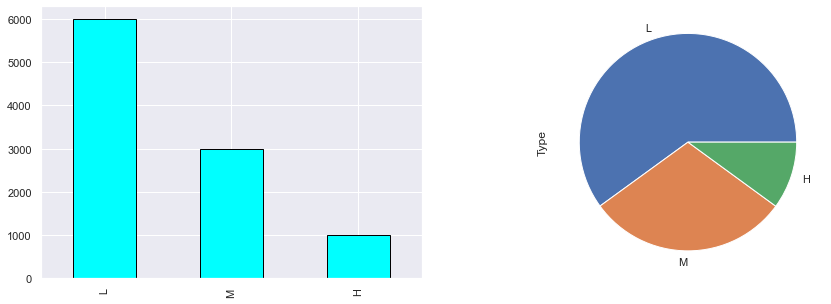

In [513]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Type'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Type'].value_counts().plot.pie()
plt.show()

### Inferences:

- Letters L, M, or H for low (60% of all products), medium (30%) and high (10%) as product quality Type.
- lets check if product quality and machine failure have any correlation.

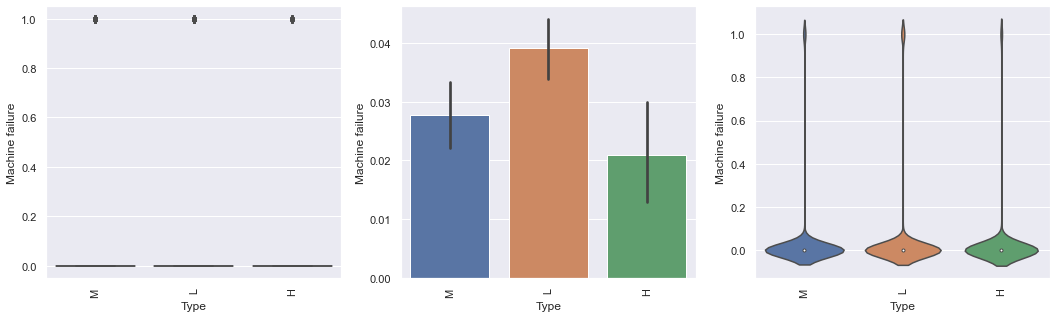

In [514]:
# Plotting Type vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Type'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['Type'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Type'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

In [515]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.4 Data Preparation & Visualisation - Column `Air temperature [K]`

In [516]:
# Checking value counts of column Type

df['Air temperature [K]'].value_counts()

300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
300.6    216
298.2    208
302.3    203
300.4    198
297.5    198
300.8    196
298.1    188
300.3    188
298.0    184
300.2    182
299.0    177
298.3    175
300.9    166
302.2    166
300.1    164
298.4    159
301.0    155
297.3    155
302.4    151
299.1    150
301.5    150
297.6    148
298.6    147
297.9    146
299.2    145
298.7    143
298.5    142
300.0    140
301.4    138
299.3    137
301.3    136
299.8    134
302.5    128
301.7    126
302.0    124
302.6    120
299.7    117
301.9    115
297.7    112
297.8    111
301.1    110
297.2    110
301.8    108
299.9    102
299.6    101
299.4    101
301.6    100
301.2     98
303.7     96
303.5     89
302.1     88
303.4     85
302.7     84
299.5     82
303.6     78
297.1     77
303.8     75
296.9     72
296.8     61
297.0     61
303.0     60
302.9     59
303.9     58
302.8     57
303.3     57
304.1     46
304.0     45
304.2     40
303.1     38
295.6     38
296.7     37
296.6     30

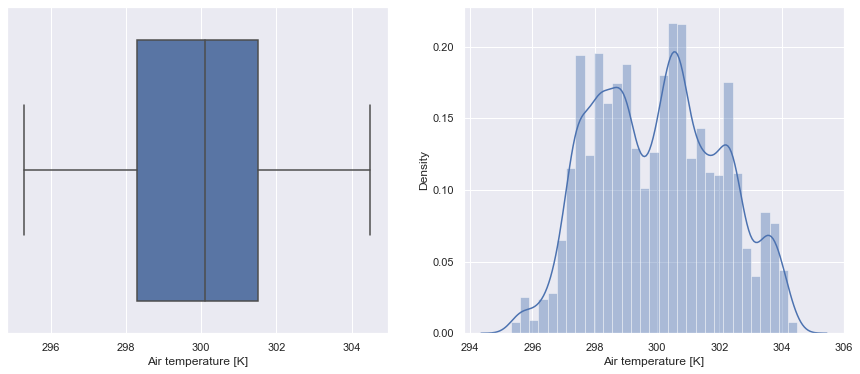

In [517]:
# Checking value distribution for column Air temperature [K]
plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Air temperature [K]'])

plt.subplot(122)
sns.distplot(df['Air temperature [K]'])
plt.show()

In [518]:
df['Air temperature [K]'].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64

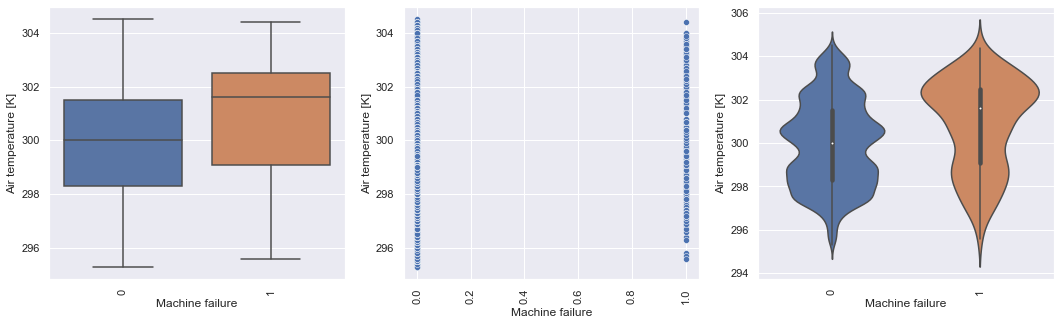

In [519]:
# Plotting Air temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Air temperature [K]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Air temperature [K]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Air temperature [K]'])
plt.xticks(rotation=90)
plt.show()

### Inferences:

- Values of column Air temperature [K] distributed with a standard deviation of 2 K around 300 K.
- Median value for machine failure is close to 302K.

In [520]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.5 Data Preparation & Visualisation - Column `Process temperature [K]`

In [521]:
# Checking value counts of column Type

df['Process temperature [K]'].value_counts()

310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
310.1    260
308.5    257
310.4    254
311.0    246
310.9    245
309.6    242
308.4    237
309.4    223
311.1    222
309.1    218
308.7    218
310.2    213
311.2    210
309.2    208
311.4    207
309.0    205
309.5    203
308.3    202
309.7    200
309.3    193
309.8    191
310.0    183
310.3    182
309.9    178
308.9    173
311.5    170
311.7    169
311.3    165
308.8    160
311.6    156
307.9    154
307.8    147
311.8    146
308.2    143
308.1    130
311.9    121
308.0    120
312.0    107
312.3     97
312.4     92
307.6     91
307.7     86
312.2     77
312.1     65
312.7     64
312.5     59
307.5     58
307.4     57
313.0     55
312.6     53
313.1     50
313.2     50
312.8     43
312.9     43
307.3     36
307.2     36
313.3     29
306.2     26
313.4     24
313.5     22
307.1     20
306.1     17
313.6     16
306.0     14
306.3     13
306.6     13
306.5      9
306.4      8
305.9      6
307.0      5
306.7      5
306.8      4

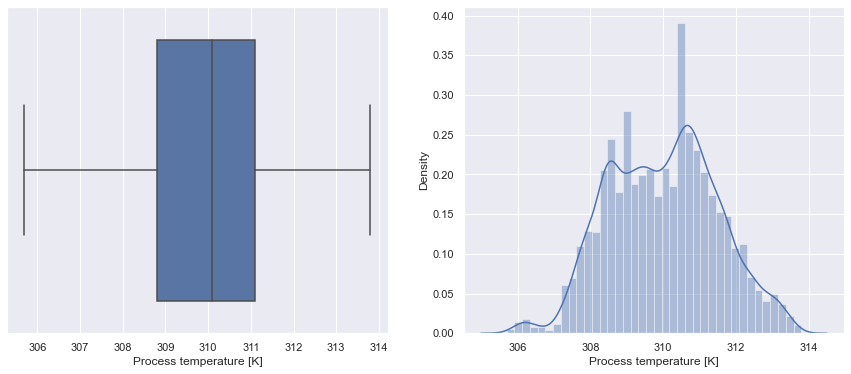

In [522]:
# Checking value distribution for column 'Process temperature [K]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Process temperature [K]'])

plt.subplot(122)
sns.distplot(df['Process temperature [K]'])
plt.show()

In [523]:
df['Process temperature [K]'].describe()

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

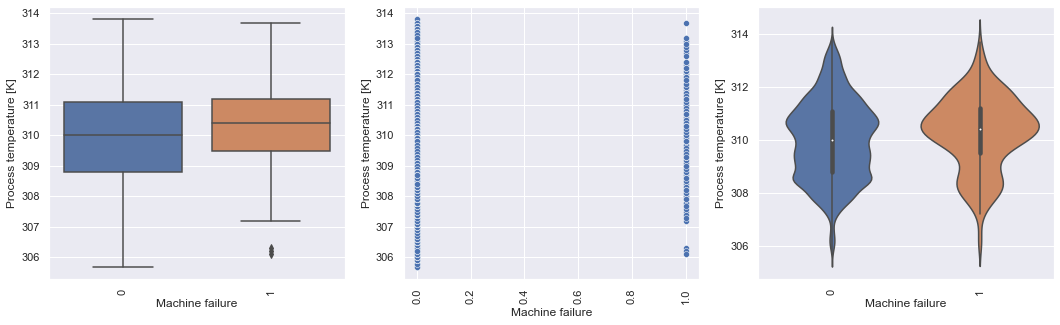

In [524]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Process temperature [K]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Process temperature [K]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Process temperature [K]'])
plt.xticks(rotation=90)
plt.show()

### Inference:

- Values of column Process temperature [K] distributed with a standard deviation of 1.48 K around 310 K.
- Median value for machine failure is close to 310.5K.

In [525]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.6 Data Preparation & Visualisation - Column `Rotational speed [rpm]`

In [526]:
# Checking value counts of column Type

df['Rotational speed [rpm]'].value_counts()

1452    48
1435    43
1447    42
1469    40
1479    40
1429    40
1418    39
1450    39
1507    39
1477    38
1446    38
1486    37
1448    37
1445    36
1397    36
1492    35
1462    35
1471    35
1456    35
1465    35
1505    35
1412    34
1459    34
1487    34
1483    34
1434    34
1470    34
1433    34
1530    34
1495    34
1432    33
1474    33
1510    33
1496    33
1488    33
1419    33
1436    32
1453    32
1490    32
1472    32
1422    32
1390    32
1457    32
1540    32
1430    32
1438    32
1466    32
1521    32
1491    32
1525    31
1420    31
1481    31
1441    31
1501    31
1378    31
1413    30
1427    30
1499    30
1463    30
1451    30
1393    30
1425    30
1426    30
1402    30
1523    30
1443    30
1520    30
1498    30
1511    30
1517    30
1416    30
1424    30
1551    30
1548    29
1423    29
1431    29
1439    29
1461    29
1440    29
1475    29
1389    29
1442    29
1489    29
1502    29
1546    29
1542    29
1449    29
1455    29
1384    29
1544    29
1504    29

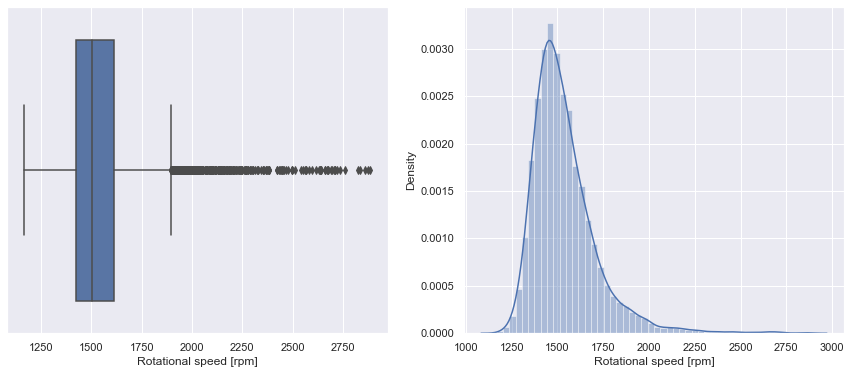

In [527]:
# Checking value distribution for column 'Rotational speed [rpm]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Rotational speed [rpm]'])

plt.subplot(122)
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [528]:
df['Rotational speed [rpm]'].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

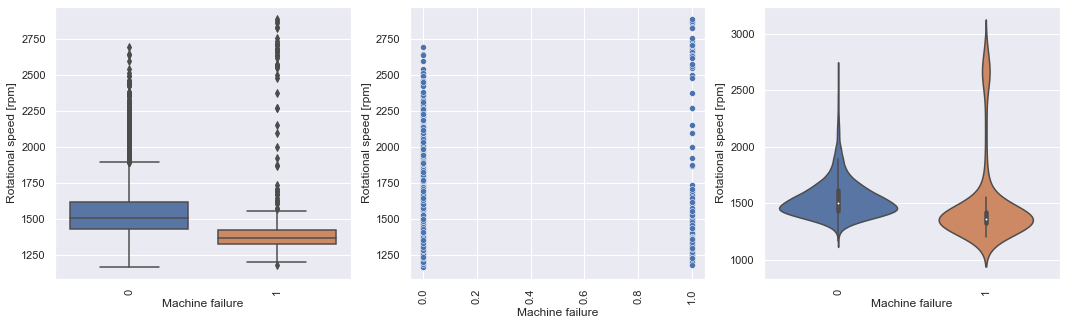

In [529]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Rotational speed [rpm]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Rotational speed [rpm]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Rotational speed [rpm]'])
plt.xticks(rotation=90)
plt.show()

### Inference:

- Values of column Rotational speed [rpm] distributed with a standard deviation of 179.28 K around 1503 K.
- Median value for machine failure is close to 1350K.

In [530]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.7 Data Preparation & Visualisation - Column `Torque [Nm]`

In [531]:
# Checking value counts of column Type

df['Torque [Nm]'].value_counts()

40.2    52
42.4    50
35.8    50
38.5    50
37.7    49
38.2    48
39.9    48
40.6    48
41.2    47
36.6    47
40.0    47
35.2    47
37.9    46
42.5    46
43.4    46
36.0    45
47.3    45
43.2    45
40.4    45
36.1    44
39.0    44
44.5    44
38.8    44
42.8    44
43.9    44
40.7    43
41.8    43
34.6    42
37.2    42
46.6    42
39.2    41
44.1    41
36.9    41
45.5    41
36.7    41
41.9    41
45.7    41
37.6    41
44.4    41
41.4    41
44.0    41
39.4    41
40.1    40
38.0    40
36.8    40
35.0    39
44.7    39
41.5    39
42.9    39
45.3    39
45.8    39
36.2    39
43.0    39
35.9    38
39.7    38
40.9    38
38.1    38
34.1    38
30.8    37
42.0    37
42.6    37
37.1    37
39.8    37
43.5    37
37.5    37
47.7    37
45.1    37
44.9    37
31.1    37
33.3    37
32.4    37
46.3    37
44.3    37
37.0    37
46.5    37
32.7    37
34.9    36
43.7    36
35.7    36
42.1    36
47.6    36
44.2    36
34.3    36
41.3    36
48.1    36
33.7    36
43.1    36
41.7    35
45.4    35
38.7    35
33.4    35

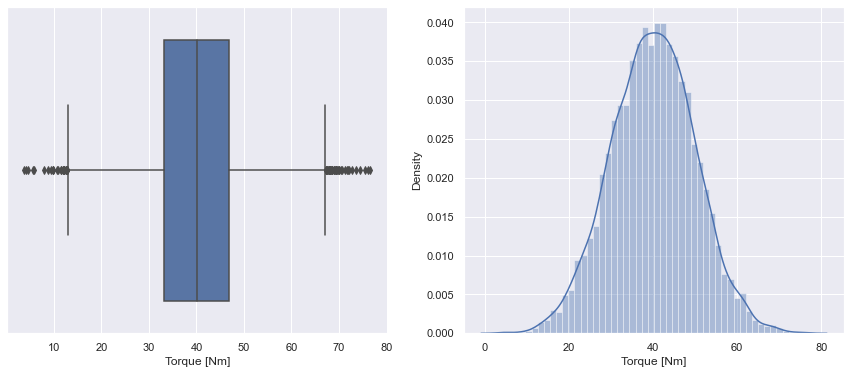

In [532]:
# Checking value distribution for column 'Torque [Nm]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Torque [Nm]'])

plt.subplot(122)
sns.distplot(df['Torque [Nm]'])
plt.show()

In [533]:
df['Torque [Nm]'].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64

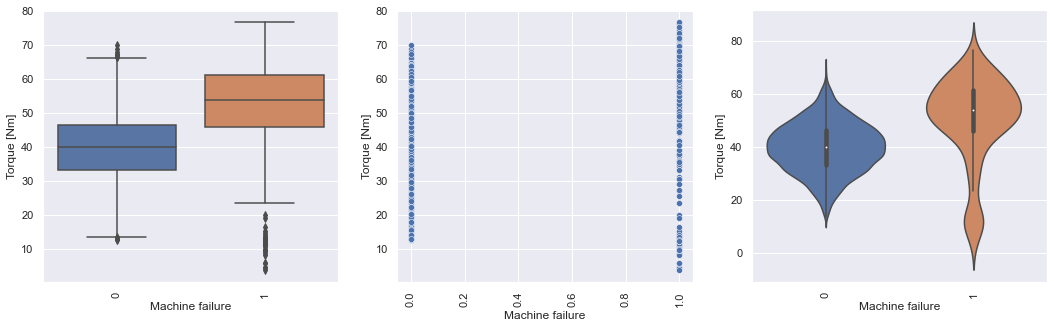

In [534]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Torque [Nm]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Torque [Nm]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Torque [Nm]'])
plt.xticks(rotation=90)
plt.show()

### Inference:
- Values of column Torque [Nm] distributed with a standard deviation of 9.96 Nm around 40 Nm. 
- Median value for machine failure is close to 55 Nm.

In [535]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.8 Data Preparation & Visualisation - Column `Tool wear [min]`

In [536]:
# Checking value counts of column Type

df['Tool wear [min]'].value_counts()

0      120
2       69
5       63
59      58
7       58
166     57
119     57
9       55
146     54
96      54
148     54
181     54
179     53
124     53
15      53
33      53
137     53
171     52
44      52
76      52
98      52
17      52
74      52
150     52
160     51
35      51
142     51
94      51
92      51
20      51
85      51
168     50
37      50
139     50
155     50
79      50
13      50
12      50
104     50
176     50
188     50
197     50
57      50
23      50
24      49
40      49
127     49
192     49
64      49
112     49
49      49
121     49
173     49
87      48
68      48
66      48
101     48
109     48
71      48
135     48
130     48
158     48
190     48
30      48
174     48
175     48
18      48
129     48
144     48
47      47
42      47
204     47
196     47
111     47
116     47
100     47
117     47
73      47
28      47
193     47
203     47
83      47
199     47
177     47
170     47
14      47
50      47
48      47
62      47
54      47
114     47

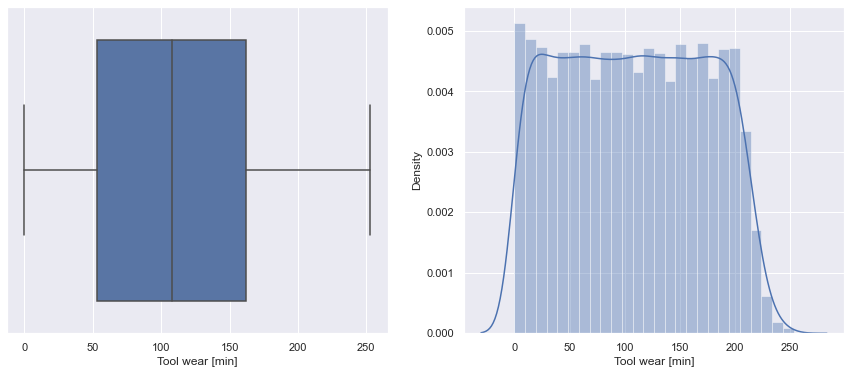

In [537]:
# Checking value distribution for column 'Tool wear [min]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Tool wear [min]'])

plt.subplot(122)
sns.distplot(df['Tool wear [min]'])
plt.show()

In [538]:
df['Tool wear [min]'].describe()

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool wear [min], dtype: float64

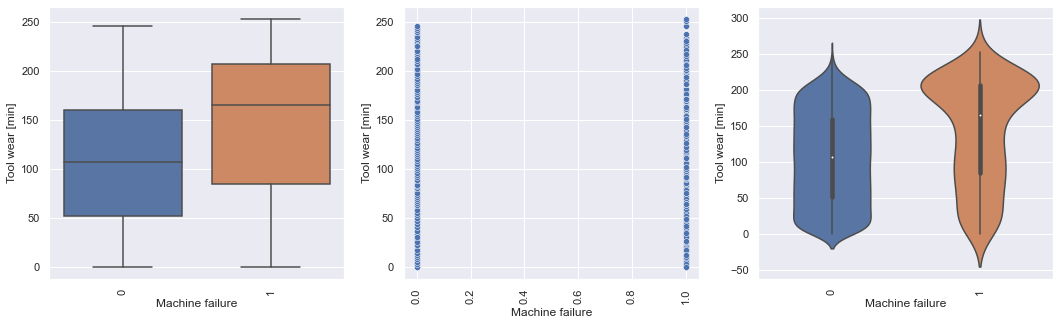

In [539]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Tool wear [min]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Tool wear [min]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Tool wear [min]'])
plt.xticks(rotation=90)
plt.show()

### Inference:
- Values of column Tool wear [min] distributed with a standard deviation of 63.65 in around 108 min.
- Median value for machine failure is close to 160 min.

In [540]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.9 Data Preparation & Visualisation - Column `TWF` i.e. Tool Wear Failure

In [541]:
# Checking value counts of column Type

df['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [542]:
# Checking percentage of value distribution between levels

100*(df['TWF'].value_counts(normalize = True))

0    99.54
1     0.46
Name: TWF, dtype: float64

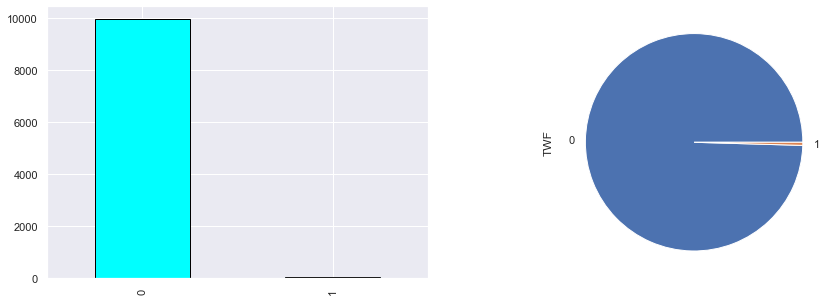

In [543]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['TWF'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['TWF'].value_counts().plot.pie()
plt.show()

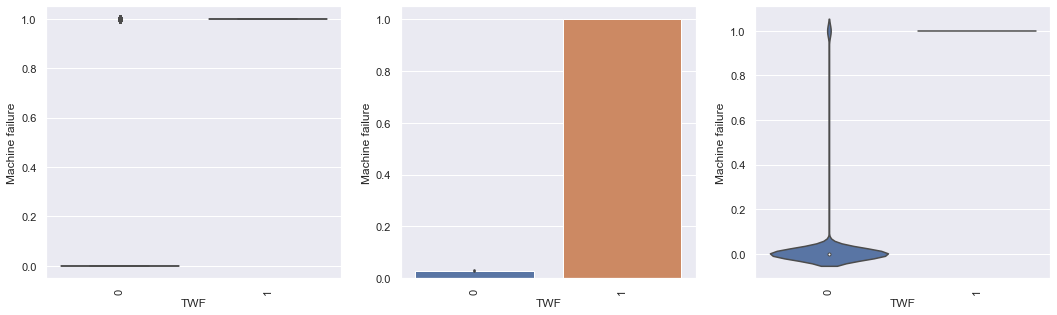

In [544]:
# Plotting TWF vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['TWF'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['TWF'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['TWF'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

### Inference:

- For column TWF is highly imbalanced with 46 machine failure due to tool wear failure and 9954 instances of no failure.

In [545]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.10 Data Preparation & Visualisation - Column `HDF` i.e. Heat Dissipation Failure

In [546]:
# Checking value counts of column Type

df['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [547]:
# Checking percentage of value distribution between levels

100*(df['HDF'].value_counts(normalize = True))

0    98.85
1     1.15
Name: HDF, dtype: float64

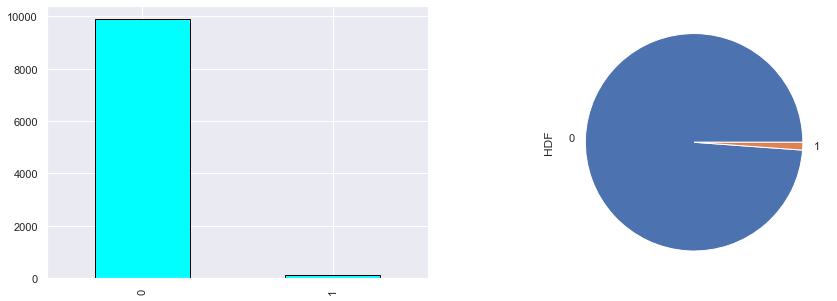

In [548]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['HDF'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['HDF'].value_counts().plot.pie()
plt.show()

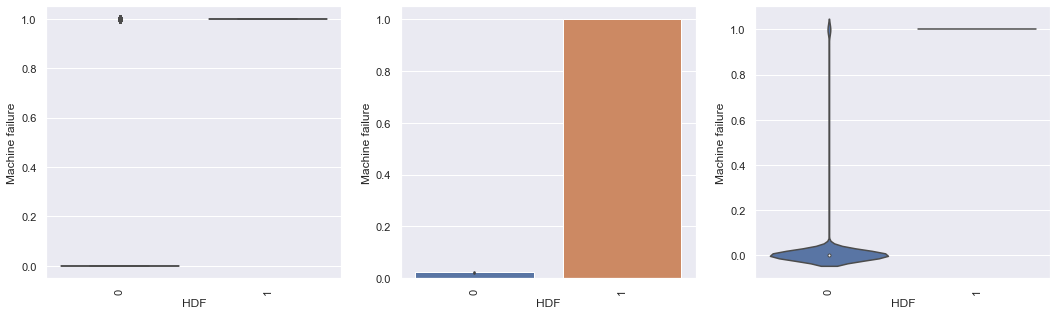

In [549]:
# Plotting HDF vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['HDF'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['HDF'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['HDF'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

### Inference:

- For column HDF is highly imbalanced with 115 machine failure due to Heat Dissipation failure and 9885 instances of no failure.

In [550]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.11 Data Preparation & Visualisation - Column `PWF` i.e. Power Failure

In [551]:
# Checking value counts of column Type

df['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [552]:
# Checking percentage of value distribution between levels

100*(df['PWF'].value_counts(normalize = True))

0    99.05
1     0.95
Name: PWF, dtype: float64

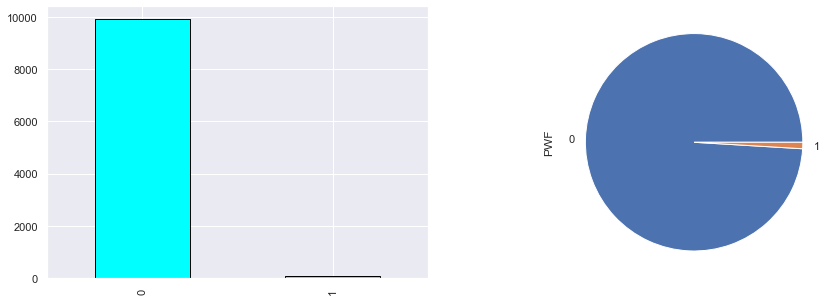

In [553]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['PWF'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['PWF'].value_counts().plot.pie()
plt.show()

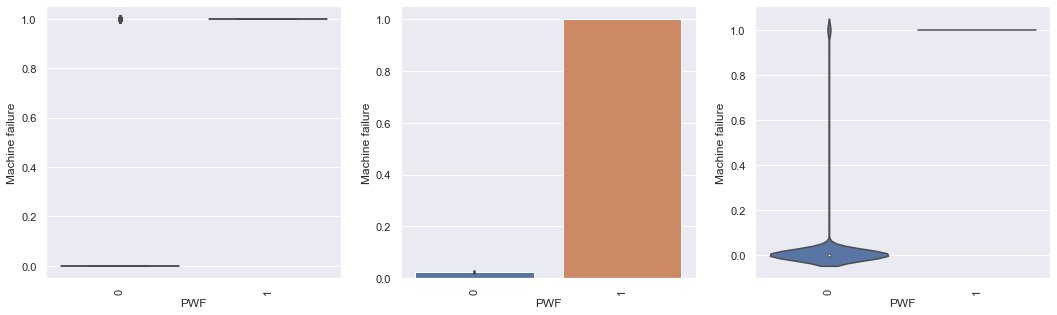

In [554]:
# Plotting PWF vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['PWF'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['PWF'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['PWF'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

### Inference:

- For column PWF is highly imbalanced with 95 machine failure due to power failure and 9905 instances of no failure

In [555]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.12 Data Preparation & Visualisation - Column `OSF` i.e. OverStrain Failure

In [556]:
# Checking value counts of column Type

df['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [557]:
# Checking percentage of value distribution between levels

100*(df['OSF'].value_counts(normalize = True))

0    99.02
1     0.98
Name: OSF, dtype: float64

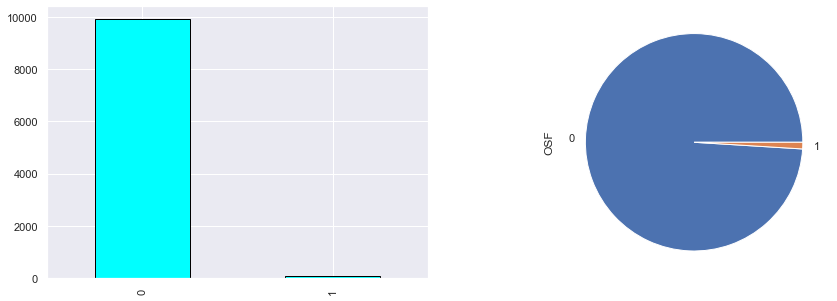

In [558]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['OSF'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['OSF'].value_counts().plot.pie()
plt.show()

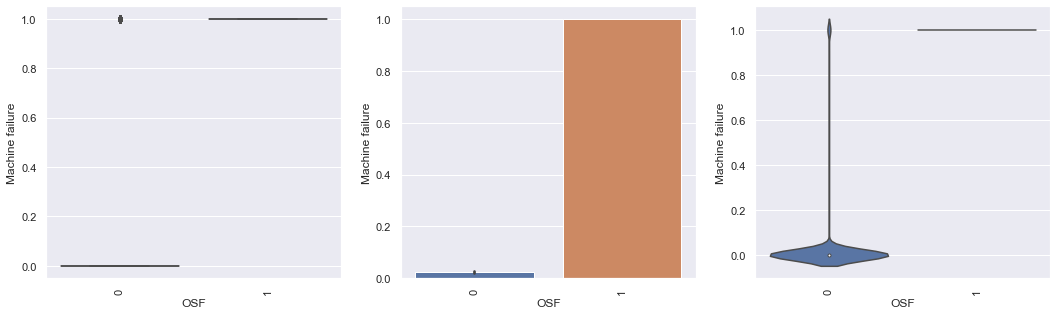

In [559]:
# Plotting OSF vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['OSF'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['OSF'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['OSF'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

### Inference:
- For column OSF is highly imbalanced with 98 machine failure due to OverStrain failure and 9902 instances of no failure

In [560]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.13 Data Preparation & Visualisation- Column RNF i.e. Random Failure

In [561]:
# Checking value counts of column Type

df['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

In [562]:
# Checking percentage of value distribution between levels

100*(df['RNF'].value_counts(normalize = True))

0    99.81
1     0.19
Name: RNF, dtype: float64

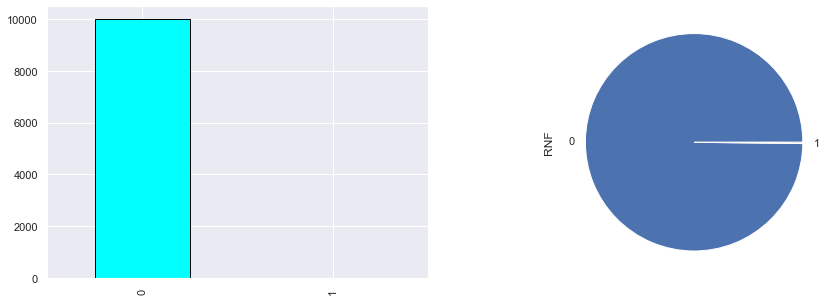

In [563]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['RNF'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['RNF'].value_counts().plot.pie()
plt.show()

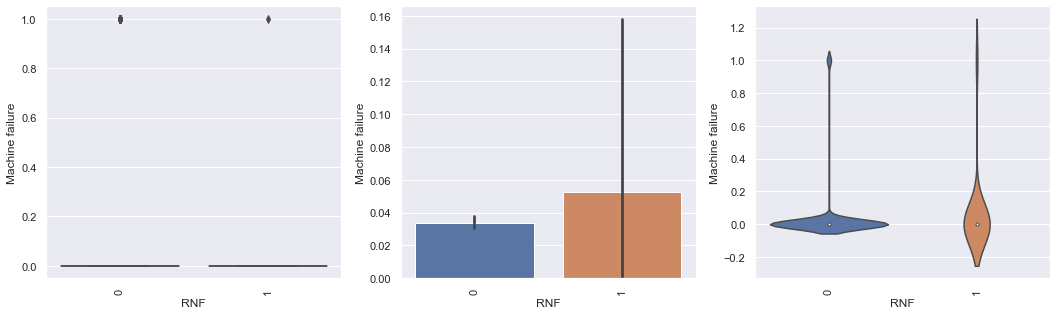

In [564]:
# Plotting RNF vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['RNF'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['RNF'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['RNF'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

### Inference:

- For column HDF is highly imbalanced with 19 machine failure due to Random Failure and 9981 instances of no failure

In [565]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.14 Data Preparation & Visualisation- Column `Machine Failure`

In [566]:
# Checking value counts of column Type

df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [567]:
# Checking percentage of value distribution between levels

100*(df['Machine failure'].value_counts(normalize = True))

0    96.61
1     3.39
Name: Machine failure, dtype: float64

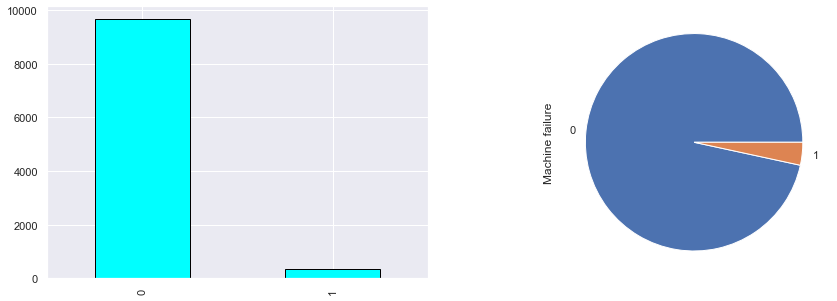

In [568]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Machine failure'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Machine failure'].value_counts().plot.pie()
plt.show()

### Inference:

- Target column Machine failure is highly imbalanced with 339 machine failure and 9661 instances of no failure.

In [569]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# Logging operation

logging.info('Data preparation and Visualisation is done')

### 2.15 Data Preparation & Visualisation

- Multivarious analysis
- Pairplot
- Heatmap

#### 2.15.1 Tool Wear Vs. Roatational speed Vs. Tool Wear Failure

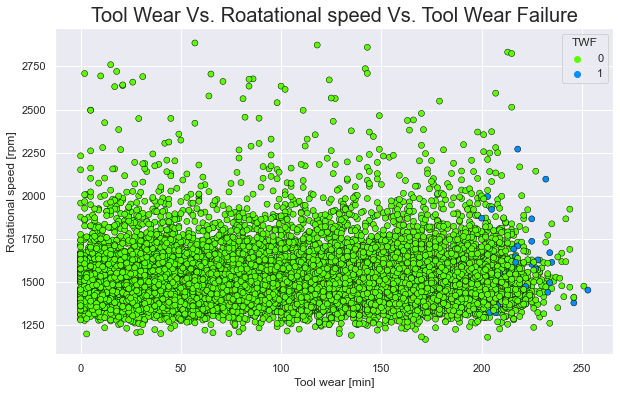

In [570]:
# Effect of Tool wear and rotational speed on tool wear failure

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Tool wear [min]', 
                y='Rotational speed [rpm]', 
                hue='TWF', 
                data= df, 
                palette='gist_rainbow',
                edgecolor = 'Black')

plt.title('Tool Wear Vs. Roatational speed Vs. Tool Wear Failure',fontweight="10", size=20)
plt.show()

#### 2.15.2 Air temperature [K] Vs. rotational speed Vs. HDF

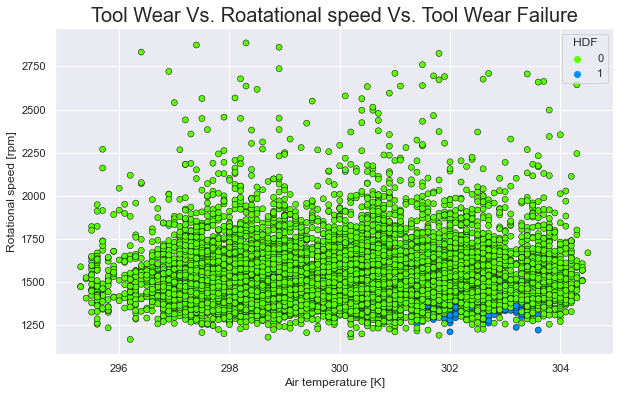

In [571]:
# Checking Heat dissipation failure the effect of Air temperture and roatational speed of machine 

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Air temperature [K]', 
                y='Rotational speed [rpm]', 
                hue='HDF', 
                data= df, 
                palette='gist_rainbow',
                edgecolor = 'Black')

plt.title('Tool Wear Vs. Roatational speed Vs. Tool Wear Failure',fontweight="10", size=20)
plt.show()

#### 2.15.3 Process temperature [K] Vs. rotational speed Vs. HDF

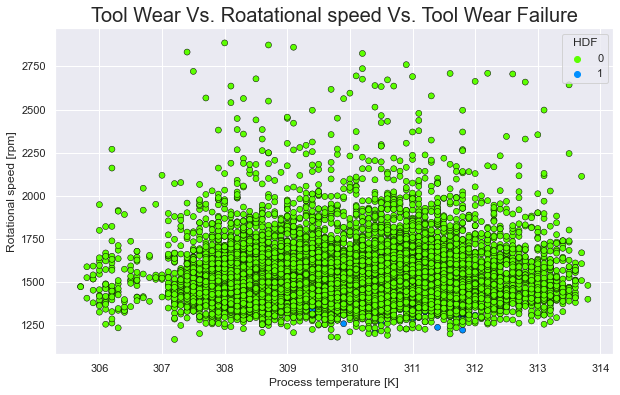

In [572]:
# Checking Heat dissipation failure the effect of process temperture and roatational speed of machine 

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Process temperature [K]', 
                y='Rotational speed [rpm]', 
                hue='HDF', 
                data= df, 
                palette='gist_rainbow',
                edgecolor = 'Black')

plt.title('Tool Wear Vs. Roatational speed Vs. Tool Wear Failure',fontweight="10", size=20)
plt.show()

#### 2.15.4 Tool wear Vs. torque Vs. OSF

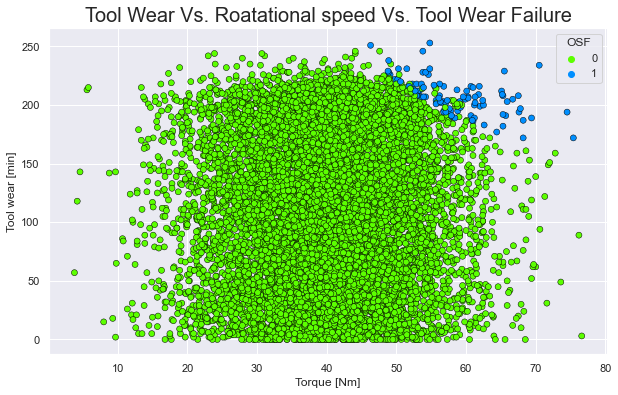

In [573]:
# The effect of product of tool wear and torque resulting overstrain failure
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Torque [Nm]', 
                y='Tool wear [min]', 
                hue='OSF', 
                data= df, 
                palette='gist_rainbow',
                edgecolor = 'Black')

plt.title('Tool Wear Vs. Roatational speed Vs. Tool Wear Failure',fontweight="10", size=20)
plt.show()

#### 2.15.5 Data Preparation & Visualisation: Pairplot

In [574]:
#sns.pairplot(df)
#plt.show()

#### 2.15.6 Data Preparation & Visualisation: Heatmap

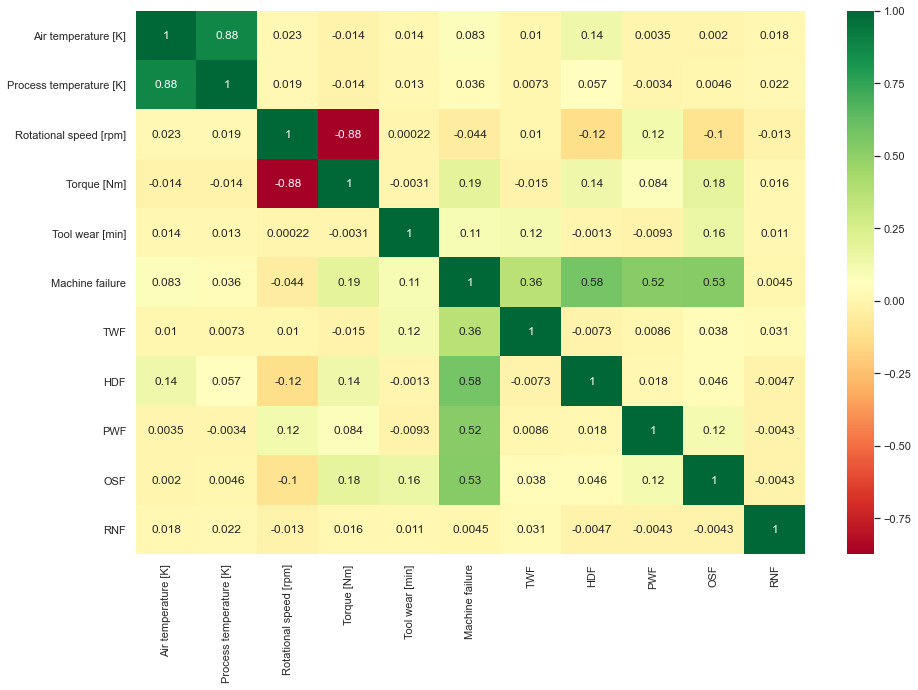

In [575]:
# Plotting heatmap

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Inferences:

- Air temperature and process temperture are highly positively correlated 0.88
- while torque and rotational speed are highly negatively correlated -0.88
- Various failure modes are positively correlated to target variable Machine failure

In [ ]:
# Logging operation

logging.info('Data Visualisation is done')

## 3. Feature Engineering
- Dummy varible creation
- Outlier treatment

In [576]:
# Dataframe

df.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [577]:
# Converting Nominal data of column 'Type' to dummy variable

TYPE = pd.get_dummies(df['Type'], drop_first = True)

df = pd.concat([df, TYPE], axis = 1)

In [578]:
# Checking dataframe again

df.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0
5,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,0,1
6,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0,1,0
7,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0,1,0
8,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,0,1
9,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,0,1


In [579]:
# Dropping column Type

df = df.drop('Type', axis =1)

In [580]:
# Checking dataframe again

df.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0
5,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,0,1
6,298.1,308.6,1558,42.4,14,0,0,0,0,0,0,1,0
7,298.1,308.6,1527,40.2,16,0,0,0,0,0,0,1,0
8,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,0,1
9,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,0,1


### Outlier treatment

In [581]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190,0.600000,0.299700
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355,0.489922,0.458149
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1%,295.900000,306.600000,1275.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
10%,297.400000,308.100000,1364.000000,27.200000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
90%,302.700000,311.900000,1746.000000,52.600000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000


### Inference:

- No outliers

In [ ]:
# Logging operation

logging.info('Feature engineering is done')

## 4. Data Pre-Processing
- Data spliting into train, validation, test
- Feature scaling
- Defining X_train & y_train for model building

### 4.1 Data spliting into train, validation, test

In [589]:
# Train-validation-test split

df_train, df_validate, df_test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

In [591]:
print(f'Training dataset shape {df_train.shape}')
print(f'Validation dataset shape {df_validate.shape}')
print(f'testing dataset shape {df_test.shape}')

Training dataset shape (6000, 13)
Validation dataset shape (2000, 13)
testing dataset shape (2000, 13)


### 4.2 Feature scaling

In [592]:
# Importing Sklearn library for scaling

from sklearn.preprocessing import MinMaxScaler

In [593]:
# Instantiate an object

scaler = MinMaxScaler()

df_train_sc = scaler.fit_transform(df_train)

df_validate_sc = scaler.transform(df_validate)

df_test_sc = scaler.transform(df_test)

In [596]:
df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
df_train_sc.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
0,0.597826,0.5625,0.215367,0.443681,0.788845,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.902174,0.7500,0.147264,0.563187,0.402390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.326087,0.2625,0.184517,0.524725,0.466135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.869565,0.6875,0.246799,0.410714,0.055777,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.771739,0.5750,0.405704,0.276099,0.513944,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [598]:
df_validate_sc = pd.DataFrame(df_validate_sc, columns = df_validate.columns)
df_validate_sc.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
0,0.402174,0.3500,0.329453,0.392857,0.641434,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.304348,0.3250,0.155995,0.589286,0.410359,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.608696,0.6250,0.182771,0.456044,0.019920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.521739,0.4250,0.126310,0.581044,0.478088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.532609,0.7125,0.201979,0.453297,0.107570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [599]:
df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
df_test_sc.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
0,0.228261,0.3250,0.130384,0.630495,0.693227,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.510870,0.5375,0.084983,0.682692,0.792829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.532609,0.5000,0.208382,0.574176,0.697211,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.043478,0.0500,0.332363,0.303571,0.374502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.706522,0.6125,0.146682,0.662088,0.350598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4.2 Defining X_train & y_train for model building

In [600]:
# Defining the X_train, y_train

y_train_sc = df_train_sc['Machine failure']
X_train_sc = df_train_sc.drop('Machine failure',axis=1)
y_test_sc = df_test_sc['Machine failure']
X_test_sc = df_test_sc.drop('Machine failure',axis=1)

In [601]:
X_train_sc.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,L,M
0,0.597826,0.5625,0.215367,0.443681,0.788845,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.902174,0.7500,0.147264,0.563187,0.402390,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.326087,0.2625,0.184517,0.524725,0.466135,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.869565,0.6875,0.246799,0.410714,0.055777,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.771739,0.5750,0.405704,0.276099,0.513944,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [602]:
y_train_sc.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Machine failure, dtype: float64

In [ ]:
# Logging operation

logging.info('Data Preprocessing is done')

## 5. Model Building:

Models for classification of machine failure
- Logistic regression
- SVM
- Descision Tree
- Random Forest
- Gradient boosting
- XG Boosting
- ANN- Logistic regression
- Proposed Multitask learning

### 5.1 Model Building: Without any minority class augmentation techique

### 5.2 Model Building: Using SMOTE technqiues

### 5.3 Model Building: Using Autoencoders

In [603]:
"""
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')
"""

"\n# train autoencoder for classification with no compression in the bottleneck layer\nfrom sklearn.datasets import make_classification\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Input\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.layers import LeakyReLU\nfrom tensorflow.keras.layers import BatchNormalization\nfrom tensorflow.keras.utils import plot_model\nfrom matplotlib import pyplot\n# define dataset\nX, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)\n# number of input columns\nn_inputs = X.shape[1]\n# split into train test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)\n# scale data\nt = MinMaxScaler()\nt.fit(X_train)\nX_train = t.transform(X_train)\nX_test = t.transform(X_test)\n# define encoder\nvisible = Input(shape=